The Effects of the Covid-19 Pandemic on Various Life Factors

Here, we will examine a survey taken by a sample of students ranging in age from 13 to 22. Students were asked to rate their overall feelings about stress, family/friend relationships on a scale of 1-6. Students were also asked to report the number of hours spent doing homework before and after the pandemic. We will look for trends based on demographic factors such as age, location, learning environment, etc. 

We begin by importing the necessary libraries.

In [101]:
#Imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
We load the CSV file containing our survey responses. 

In [102]:
#Load the survey data to the notebook

# Get the path to the "documents" folder
documents_folder = os.path.expanduser('~/Documents')

# Specify the file name
file_name = 'Covid_Responses.csv'

# Construct the full file path
file_path = os.path.join(documents_folder, file_name)

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

We want to be as thorough as possible when trying to understand our data. To that end, we some critical factors about our data including the various data types, the number of non-null values (which tells us how many responses we have to each survey question), file size, etc. This next step will also confirm that the correct file is loaded.

In [103]:
#Initial exploration of the data (datatypes, non-null values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                40 non-null     object 
 1   Country                 40 non-null     object 
 2   State                   28 non-null     object 
 3   Age                     40 non-null     int64  
 4   Gender                  37 non-null     object 
 5   Before-Environment      40 non-null     object 
 6   Before-ClassworkStress  40 non-null     int64  
 7   Before-HomeworkStress   40 non-null     int64  
 8   Before-HomeworkHours    40 non-null     float64
 9   Now-Environment         40 non-null     object 
 10  Now-ClassworkStress     40 non-null     int64  
 11  Now-HomeworkStress      40 non-null     int64  
 12  Now-HomeworkHours       40 non-null     float64
 13  FamilyRelationships     40 non-null     int64  
 14  FriendRelationships     40 non-null     int6

Now, that we have somewhat of an understanding of what is contained in the file, let's get a better visualization of what the file actually looks like.

In [104]:
#Initial exmamination continued
data.head()

,Category,Country,State,Age,Gender,Before-Environment,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-Environment,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
0,SchoolCollegeTraining,US,TX,14,Male,Physical,1,3,2.0,Virtual,3,5,4.5,2,-1
1,SchoolCollegeTraining,US,MD,13,Male,Physical,5,4,2.0,Virtual,3,5,2.5,1,-2
2,Homeschool,US,TX,16,Female,Virtual,1,3,10.0,Virtual,3,5,15.0,1,-1
3,SchoolCollegeTraining,US,GA,17,Male,Physical,4,4,6.0,Physical,5,1,6.0,0,-2
4,SchoolCollegeTraining,GB,NaN,14,Male,Physical,3,4,4.0,Physical,5,5,6.0,0,1


To "Dig in" a bit further, let's look to see where our missing values lie.

In [105]:
#Looking at the number of missing values
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by='count', ascending = False)
print(missing)

                        count     %
State                      12  30.0
Gender                      3   7.5
Category                    0   0.0
Country                     0   0.0
Age                         0   0.0
Before-Environment          0   0.0
Before-ClassworkStress      0   0.0
Before-HomeworkStress       0   0.0
Before-HomeworkHours        0   0.0
Now-Environment             0   0.0
Now-ClassworkStress         0   0.0
Now-HomeworkStress          0   0.0
Now-HomeworkHours           0   0.0
FamilyRelationships         0   0.0
FriendRelationships         0   0.0


It appears that the majority of missing values lie in the state column. This is not initially alarming, because, as we saw above in the .head() call, the US was not the only country included in this survey. "GB", or Great Britain, does NOT have states, for example. Let's confirm that any survey respondent outside of the US did NOT answer the survey question. 

In [125]:
# Filter the DataFrame to include only rows where the country is not the US and the state is not null
non_us_state_responses = data[(data['Country'] != 'US') & data['State'].notnull()]

# Display the filtered DataFrame
print(non_us_state_responses)


Empty DataFrame
Columns: [Category, Country, State, Age, Gender, Before-Environment, Before-ClassworkStress, Before-HomeworkStress, Before-HomeworkHours, Now-Environment, Now-ClassworkStress, Now-HomeworkStress, Now-HomeworkHours, FamilyRelationships, FriendRelationships, Region]
Index: []


The Empty DataFrame confirms that anyone who responded to the survey who lives outside of the US did NOT answer the state question. To avoid confusion and to simplify our processes, we will focus solely on data from US respondents only. The vast majority of our respondents are from the US anyway. Thus, by dropping any null values in the data, we can rest assured that no non-US data will be included going forward. 

Let's continue our examination by separating the different datatypes we will be working with. We will begin with our object data types. 

In [107]:
#Examine object types
data.select_dtypes('object')

,Category,Country,State,Gender,Before-Environment,Now-Environment
0,SchoolCollegeTraining,US,TX,Male,Physical,Virtual
1,SchoolCollegeTraining,US,MD,Male,Physical,Virtual
2,Homeschool,US,TX,Female,Virtual,Virtual
3,SchoolCollegeTraining,US,GA,Male,Physical,Physical
5,SchoolCollegeTraining,US,WV,Male,Physical,Virtual
6,SchoolCollegeTraining,US,MO,Female,Physical,Virtual
7,SchoolCollegeTraining,US,PA,Male,Physical,Virtual
8,Homeschool,US,IL,Female,Hybrid,Hybrid
9,SchoolCollegeTraining,US,MN,Female,Physical,Virtual
10,Homeschool,US,TX,Male,Hybrid,Virtual


Here, we see any categorical data, or "Nouns", if you will. Now, let's move on to any int64 data types. 

In [108]:
#Examine int64 types
data.select_dtypes('int64')

,Age,Before-ClassworkStress,Before-HomeworkStress,Now-ClassworkStress,Now-HomeworkStress,FamilyRelationships,FriendRelationships
0,14,1,3,3,5,2,-1
1,13,5,4,3,5,1,-2
2,16,1,3,3,5,1,-1
3,17,4,4,5,1,0,-2
5,17,1,1,5,6,2,-2
6,18,2,3,3,5,-2,-1
7,17,1,3,5,5,0,-3
8,16,3,3,2,4,-3,2
9,15,2,2,1,2,1,-1
10,18,3,2,4,3,0,-2


As we can see, this includes our any "non-decimal", if you will, numeric data. We see the age of our selected sample of participants as well as the rankings of various life factors. Next, we will look at our float64 data types.

In [109]:
#Examine float64 types
data.select_dtypes('float64')

,Before-HomeworkHours,Now-HomeworkHours
0,2.0,4.5
1,2.0,2.5
2,10.0,15.0
3,6.0,6.0
5,3.0,14.0
6,3.0,6.0
7,3.0,5.0
8,3.0,1.0
9,1.0,5.0
10,4.0,4.0


With our int64 data types, participants would have been confined to a simple ranking of 1-6. With float64 data types, participants can provide more concise answers. As we can see, several participants reported that they spend 4.5, 2.5, or 1.5 hours, respectively. Using int64 data types would have confined them to the exact hour, which would have lead to them having to over or underestimate their answer, thus giving us less reliable data. 

Finally, we will do some preliminary examinations of the relationships between demographics and participant responses. For example, do we notice any relationship between age and family relationships? What about Gender and Friendships? These are just a couple of examples. This final section will involve repeating a number of steps and grouping the data by various categories. A brief discussion/explanation will take place with each category.We will first group the data by Age on the Mean. 

In [123]:
#Group data by age
grouped_data = data.groupby('Age')

# Select only the numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the means of numerical columns for each age group
means = grouped_data[numerical_columns.columns].mean()

#Display the means
means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Age,,,,,,,,,
13,13.0,5.000000,4.00,2.000000,3.000000,5.000000,2.500000,1.000000,-2.000000
14,14.0,2.600000,3.40,3.400000,4.400000,5.000000,5.100000,0.200000,-0.600000
15,15.0,1.714286,2.00,2.000000,3.571429,3.857143,5.428571,0.428571,-0.428571
16,16.0,2.250000,3.25,4.500000,2.750000,4.250000,5.250000,0.000000,0.500000
17,17.0,2.333333,3.50,3.916667,3.666667,4.000000,5.416667,0.333333,-2.000000


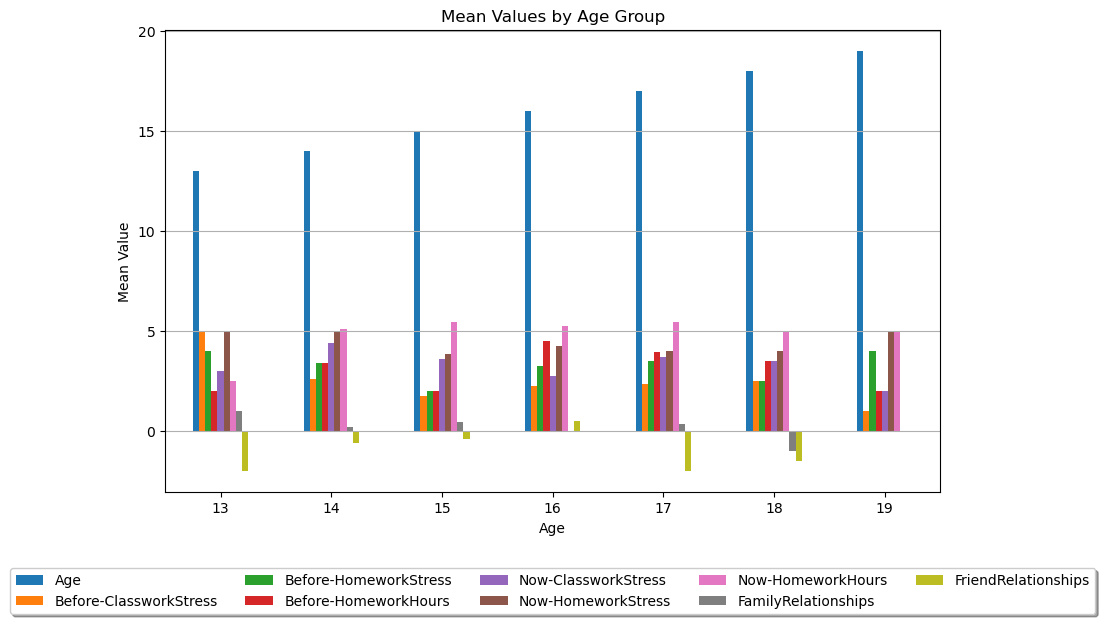

In [111]:
# Plot the means for age
ax = means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Age Group')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  
plt.grid(axis='y')

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

#Display the plot
plt.show()


Interesting! We can see a few trends here. With every age category, we can see that the number of homework hours increased. Why might this be? If a student went from the physical to virtual environment, was class time reduced? Did Teachers thereby increase the workload on students outside of class time? 

At every age, we also see an increase in classwork stress? Why? If a student moved from physical to virtual environment, were they more afraid to ask a question(s) to better understand the work they were doing? Perhaps they didn't want to "unmute themselves" in front of the whole class. At the same time, even if a student REMAINED in the physical environment, perhaps they were hesitant to approach a Teacher to ask a question due to the fear of getting infected, or of infecting the Teacher. 

The same can said for before and after homework stress. Perhaps students found it more difficult to contact/approach the Teacher during the pandemic for extra help. Perhaps those in the virtual environment historically benefitted from in-person help, but did not feel comfortable with virtual help.

Finally, let's examine the role family/friend relationships. At age 13, participants felt an increase in strength of their family relationships, but a decrease in the strength of their friend relationships. Why? Perhaps a number of them were isolated due to either change of learning environment, and/or level of comfortability with physical contact whether by choice, or by parental decision. Another particularly interesting age group is age 18. One might infer that many (if not all) of our 18 year old participants were Seniors in high school. When we think about Seniors in high school, we think about college applications, the pressure of the milestone that is their last year of high school, and trying to manage the balance between being a "legal adult", if you will, in the US, versus still living under the roof and rules of a parent or guardian. Perhaps the pressure on our 18 year old participants was so great that all of their relationships suffered due to isolation, frustration, some combination of these and/or other factors.

Next, let's examine these same factors, but look at the difference among various genders.

In [124]:
# Group the numerical data by 'Gender'
gender_groups = numerical_data.groupby(data['Gender'])

# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate means for each gender group
gender_means = gender_groups.mean()

# Display the means
gender_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Gender,,,,,,,,,
Female,15.714286,2.071429,2.785714,3.678571,3.357143,4.285714,5.964286,0.0,-0.428571
Male,15.800000,2.700000,3.100000,2.700000,3.800000,4.100000,4.300000,0.5,-1.000000
Other,15.500000,1.500000,4.000000,2.500000,3.500000,5.000000,4.000000,0.0,-2.500000


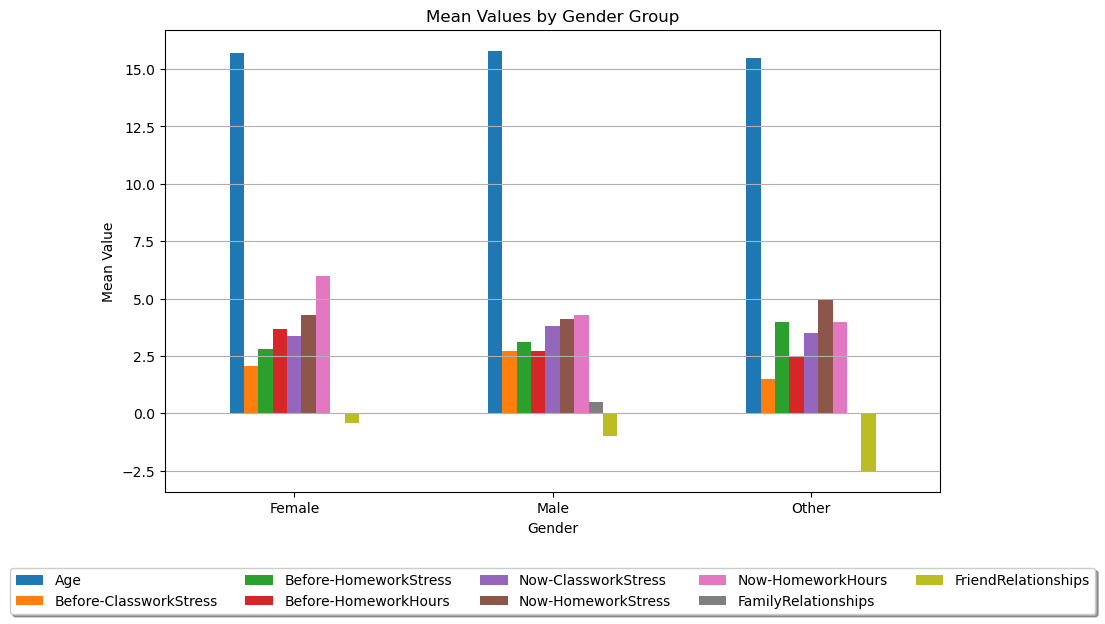

In [113]:
# Plot the means for gender
ax = gender_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Gender Group')
plt.xlabel('Gender')
plt.ylabel('Mean Value')
plt.xticks(rotation=0) 
plt.grid(axis='y')  

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


Once again, we see an increase in school/class-related stress. However, a very interesting point is that regardless of Gender, on average, friend relationships were stable if not strengthened. Also interesting, our participants who marked there Gender as "other" reported a significant decrease in the strength of their family relationships. While we don't want to go too in-depth on the topic of gender, perhaps our participants of "other" genders feel alienated from their families and if they entered into a virtual learning environment, perhaps they felt the pressure of being in increased company of a family who may not fully accept them. Perhaps school was there escape from this and that was taken away during the pandemic. Let's continue by looking at the life factors as they relate to State.

In [114]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'state'
state_groups = numerical_data.groupby(data['State'])

# Calculate means for each state group
state_means = state_groups.mean()

# Display the means
state_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
State,,,,,,,,,
AZ,19.00,1.00,4.00,2.0,2.00,5.0,5.00,0.0,0.0
CA,17.00,4.00,5.00,5.0,1.00,5.0,2.00,-1.0,-3.0
CO,14.00,5.00,4.00,9.0,6.00,5.0,10.00,-1.0,-3.0
FL,14.75,1.75,2.25,4.0,4.25,5.0,6.75,-0.5,0.5
GA,16.00,3.00,2.50,3.0,5.00,3.0,4.50,1.5,-2.5


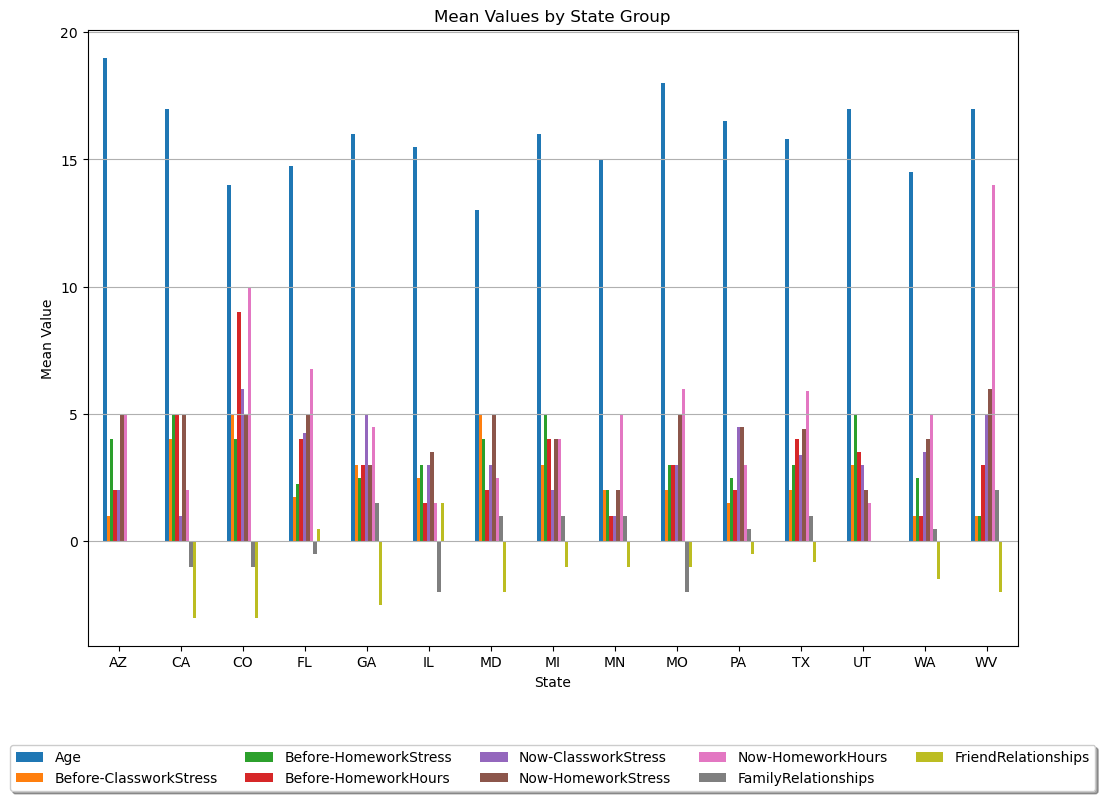

In [147]:
# Plot means using stacked bar graph
ax = state_means.plot(kind='bar', figsize=(12, 8))
plt.title('Mean Values by State Group')
plt.xlabel('State')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


In [116]:
# Define a dictionary mapping states to regions
state_region_mapping = {
    'TX': 'South',
    'MD': 'Northeast',
    'GA': 'South',
    'WV': 'South',
    'MO': 'Midwest',
    'PA': 'Northeast',
    'IL': 'Midwest',
    'MN': 'Midwest',
    'FL': 'South',
    'CO': 'West',
    'WA': 'West',
    'UT': 'West',
    'MI': 'Midwest',
    'CA': 'West',
    'AZ': 'West'
}

# Add a new column 'Region' based on the mapping
data['Region'] = data['State'].map(state_region_mapping)

# Display the DataFrame with the 'Region' column
data.head()

,Category,Country,State,Age,Gender,Before-Environment,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-Environment,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships,Region
0,SchoolCollegeTraining,US,TX,14,Male,Physical,1,3,2.0,Virtual,3,5,4.5,2,-1,South
1,SchoolCollegeTraining,US,MD,13,Male,Physical,5,4,2.0,Virtual,3,5,2.5,1,-2,Northeast
2,Homeschool,US,TX,16,Female,Virtual,1,3,10.0,Virtual,3,5,15.0,1,-1,South
3,SchoolCollegeTraining,US,GA,17,Male,Physical,4,4,6.0,Physical,5,1,6.0,0,-2,South
5,SchoolCollegeTraining,US,WV,17,Male,Physical,1,1,3.0,Virtual,5,6,14.0,2,-2,South


In [117]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Region'
region_groups = numerical_data.groupby(data['Region'])

# Calculate means for each Region group
region_means = region_groups.mean()

# Display the means
region_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Region,,,,,,,,,
Midwest,16.000000,2.400000,3.200000,2.200000,2.400000,3.600000,3.600000,-0.800000,0.00
Northeast,15.333333,2.666667,3.000000,2.000000,4.000000,4.666667,2.833333,0.666667,-1.00
South,15.583333,2.000000,2.500000,3.750000,4.083333,4.500000,6.625000,0.666667,-0.75
West,16.000000,2.500000,3.833333,3.583333,3.166667,4.166667,4.750000,-0.166667,-1.50


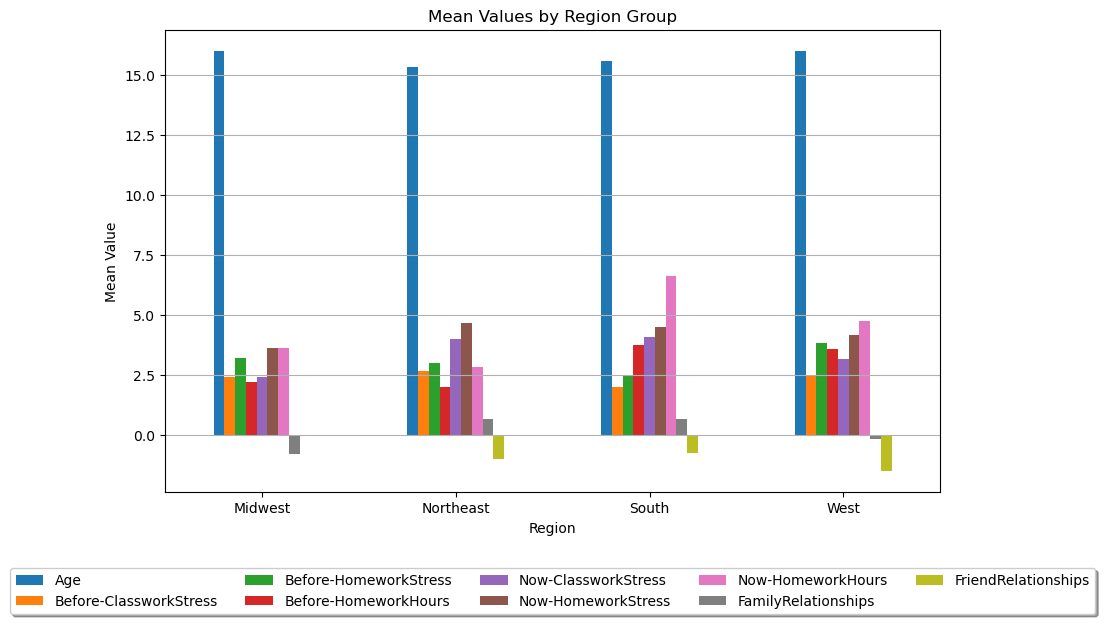

In [118]:
import matplotlib.pyplot as plt

# Plot the means for Region
ax = region_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Region Group')
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


In [119]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Before-Environment'
before_env_groups = numerical_data.groupby(data['Before-Environment'])

# Calculate means for each before_env group
before_env_means = before_env_groups.mean()

# Display the means
before_env_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Before-Environment,,,,,,,,,
Hybrid,17.666667,2.333333,3.000000,3.000000,2.666667,4.000000,3.333333,-1.000000,0.000000
Physical,15.523810,2.380952,3.095238,2.928571,3.619048,4.190476,4.976190,0.333333,-1.047619
Virtual,15.000000,1.000000,2.000000,6.500000,4.000000,5.500000,10.000000,0.500000,0.500000


In [120]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Now-Environment'
now_env_groups = numerical_data.groupby(data['Now-Environment'])

# Calculate means for each now_env group
now_env_means = now_env_groups.mean()

# Display the means
now_env_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Now-Environment,,,,,,,,,
Hybrid,15.333333,2.333333,2.333333,1.000000,3.666667,4.000000,2.000000,-0.333333,0.000000
Physical,17.000000,3.500000,4.500000,4.750000,4.000000,1.500000,3.750000,0.000000,-1.000000
Virtual,15.666667,2.142857,2.952381,3.380952,3.476190,4.571429,5.761905,0.285714,-0.904762


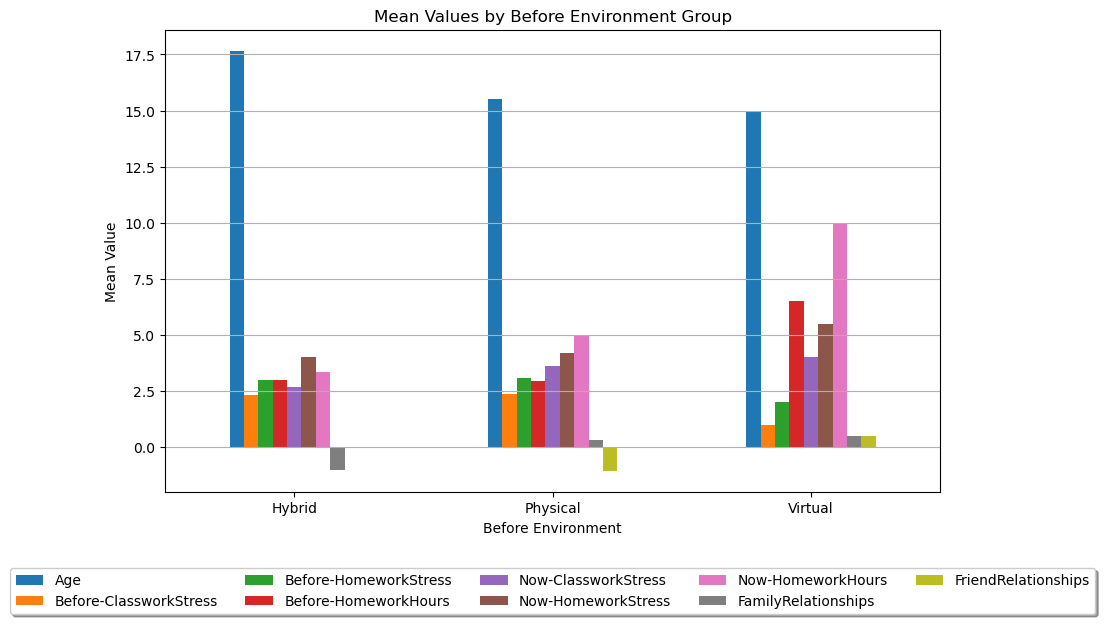

In [121]:
# Plot the means for before_env
ax = before_env_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Before Environment Group')
plt.xlabel('Before Environment')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


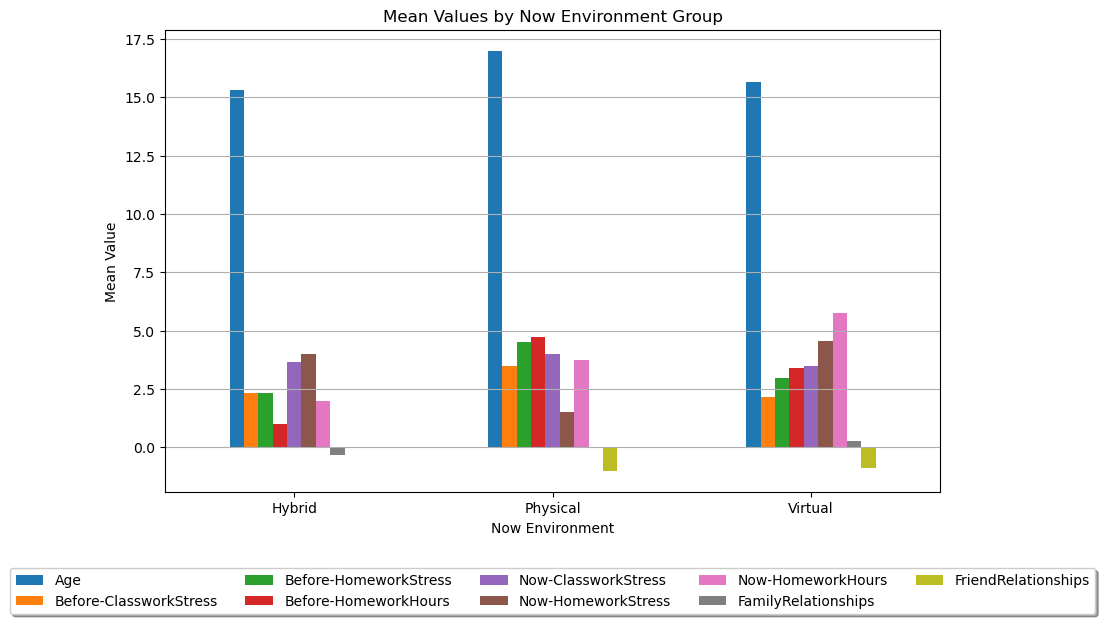

In [122]:
# Plot the means for now_env
ax = now_env_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Now Environment Group')
plt.xlabel('Now Environment')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()
